# Interpolación bilineal

In [1]:
# Definir el filtro bilineal
# Parametros de entrada: 
## Imagen de entrada
## Ancho de salida
## Alto de salida
function bilineal(Imagen,Ancho,Alto) 
    # Parametros de salida de la nueva matriz #
    naltura = Ancho
    nancho = Alto
    # Crear la nueva matriz de enteros de tamaño naltura X nancho
    nueva = zeros(Int,naltura,nancho);
    #### Dmensiones originales de la matriz
    Oaltura = size(Imagen)[1]
    Oancho = size(Imagen)[2]
    #### Definir la relación entre los tamaños
    escalaX = (Oancho-1)/(nancho-1);
    escalaY = (Oaltura-1)/(naltura-1);
    #### Aplicación del escalado ####
    for i in 1:naltura
        # Segundo loop
        for j in 1:nancho
            # Coordenadas de la imagen original
            X = escalaX*(j-1) + 1 # Adelante del borde
            Y = escalaY*(i-1) + 1 # Adelante del borde
            ### Datos para hacer el interpolado ###
            ## Coordenadas en X ##
            x1 = floor(Int,X)
            x2 = min(x1+1,Oancho)
            ## Coordenadas en Y ##
            y1 = floor(Int,Y)
            y2 = min(y1+1,Oaltura)
            # Pesos para la interpolación #
            dx = X-x1
            dy = Y-y1
            ### Extraer los valores de los pixeles vecinos ####
            Q11 = Imagen[y1,x1]
            Q12 = Imagen[y2,x1]
            Q21 = Imagen[y1,x2]
            Q22 = Imagen[y2,x2]
            ### Crear el pixel con la interpolación ####
            px = (1-dx)*(1-dy)*Q11 +
                            dx*(1-dy)*Q21 +
                            (1-dx)*dy*Q12 +
                            dx*(dy)*Q22
            # Guardarlo en la matriz de salida #
            nueva[i,j] = round.(Int,px)
        end
    end
    # Devolver la matriz resultante
    # Convertir en escala de grises #
    res = clamp.(nueva./255,0,1);
    # Convertir la matriz en escala de grises
    return(Gray.(res)) 
end

bilineal (generic function with 1 method)

# Interolación del vecino más cercano

In [2]:
# Función de interpolación por vecinos más cercanos
function vecinos(Imagen, Ancho, Alto)
    # Dimensiones de la nueva imagen
    naltura = Alto
    nancho = Ancho
    # Crear la nueva matriz de enteros de tamaño naltura × nancho
    nueva = zeros(Int, naltura, nancho)

    # Dimensiones originales de la imagen
    Oaltura, Oancho = size(Imagen)

    # Relación de escalado
    escalaX = Oancho / nancho
    escalaY = Oaltura / naltura

    # Aplicar el escalado con vecinos más cercanos
    for i in 1:naltura
        for j in 1:nancho
            # Coordenadas en la imagen original
            X = round(Int, escalaX * (j - 0.5))  # Píxel más cercano en X
            Y = round(Int, escalaY * (i - 0.5))  # Píxel más cercano en Y
            
            # Asegurar que las coordenadas estén dentro del rango
            X = clamp(X, 1, Oancho)
            Y = clamp(Y, 1, Oaltura)

            # Asignar el valor del píxel más cercano
            nueva[i, j] = Imagen[Y, X]
        end
    end

    # Convertir en escala de grises y normalizar
    res = clamp.(nueva ./ 255, 0, 1)
    return Gray.(res)
end


vecinos (generic function with 1 method)

# Cargar la imagen de prueba de la rosa

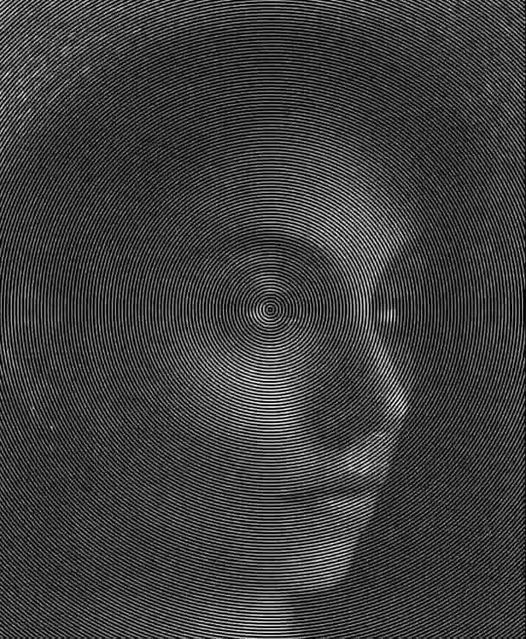

In [3]:
# Cargar las librerias para el procesado de imagenes
using Images
#using ImageView
# Imagen De referencia
ruta = "C:\\Users\\Angel\\Desktop\\MIASegundoSemestre\\VISION POR COMPUTADORA\\EXAMEN\\Imagen3.jpg"
img = load(ruta)
img1 = Gray.(img)
# Guardar la imagenm
#save("IMG/IM1gray.jpg", img1)



# Pruebas para el biltro bilineal

## Re escalar la imagen a 256x256 pixeles

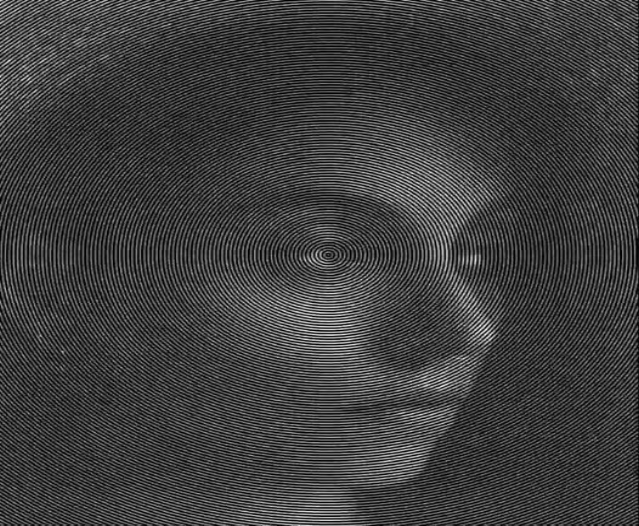

In [4]:
# Imagen De referencia
img1 = round.(Int,Gray.(img).* 255)
res1 = bilineal(img1,526,639)
save("IMG/b1.jpg", res1)
res1

# Re escalar la imagen de 256x256 a 1024x1024

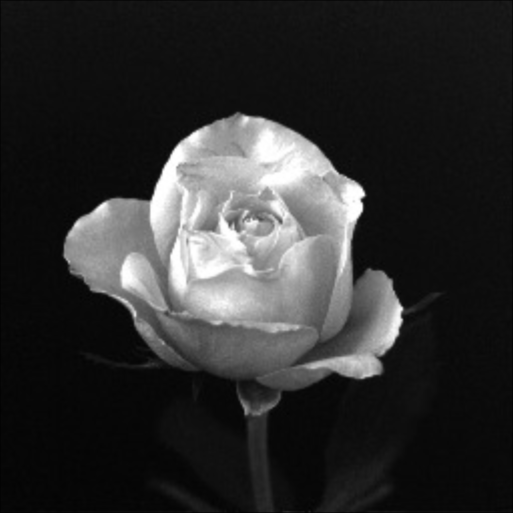

In [22]:
# Imagen De referencia
ruta1 = "IMG/b1.jpg"
img = load(ruta1)
img2 = round.(Int,Gray.(img).* 255)
res2 = bilineal(img2,1024,1024)
save("IMG/b2.jpg", res2)
res2

# Pruebas para el filtro por vecinos más cercanos

## Re escalar la imagen original a 256x256 pixeles

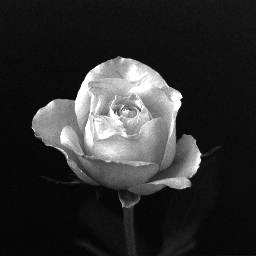

In [37]:
# Imagen De referencia
img3 = round.(Int,Gray.(img).* 255)
res3 = vecinos(img3,520,256)
save("IMG/v1.jpg", res3)
res3

## Re escalar la imagen de 256x256 a 1024x1024

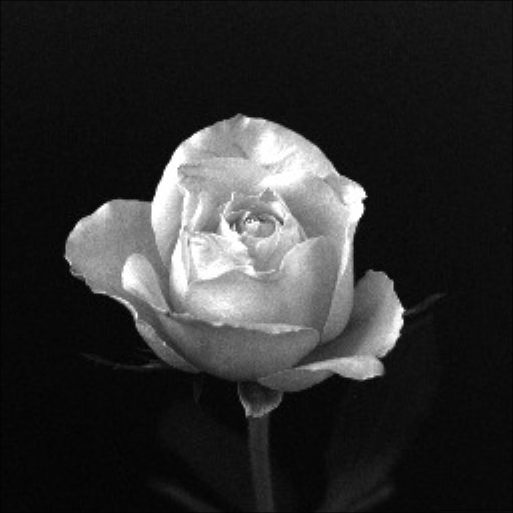

In [38]:
# Imagen De referencia
ruta2 = "IMG/v1.jpg"
img = load(ruta2)
img4 = round.(Int,Gray.(img).* 255)
res4 = vecinos(img4,1024,1024)
save("IMG/v2.jpg", res4)
res4

In [34]:
size(img)

(1024, 1024)